# Controllability

In [1]:
#use "./init.ml"

In [2]:
open Printf
open Noc
open Owl

In [3]:
let w = Mat.load_txt "../data/w"
let n, _ = Mat.shape w
let a = Mat.(w - eye n)
let tau = 20E-3
let simulate = Simulate.impulse ~tau ~n ~a

val w : Owl.Mat.mat = ...


val n : int = ...


val a : (float, Bigarray.float64_elt) Owl_dense_matrix_generic.t = ...


val tau : float = ...


val simulate : ?c:Owl.Mat.mat -> input:Owl.Mat.mat -> float -> Owl.Mat.mat =
  ...


In [4]:
(* ------- standard controllability ------ *)
let b = Mat.gaussian n 10 (* define 10 random input channels *)
let p = Gramians.ctrl ~b a
let u, s, _ = Linalg.D.svd p
let u = Mat.(transpose u)
let p_evals =  Mat.(transpose s /$ mean' s) 
let xs = Array.init 10 (fun _ -> Mat.(transpose (b *@ gaussian (col_num b) 1)))
        |> Array.map (fun input ->
            simulate ~c:u ~input 0.3)

val b : Owl.Mat.mat = ...


val p : Owl.Mat.mat = ...


val u : Owl.Linalg.D.mat = ...
val s : Owl.Linalg.D.mat = ...


val u : Owl.Mat.mat = ...


val p_evals : (Owl.Mat.elt, Bigarray.float64_elt) Owl_dense_matrix_generic.t =
  ...


val xs : Owl.Mat.mat array = ...


### Plotting the controllability Gramian eigenvalues

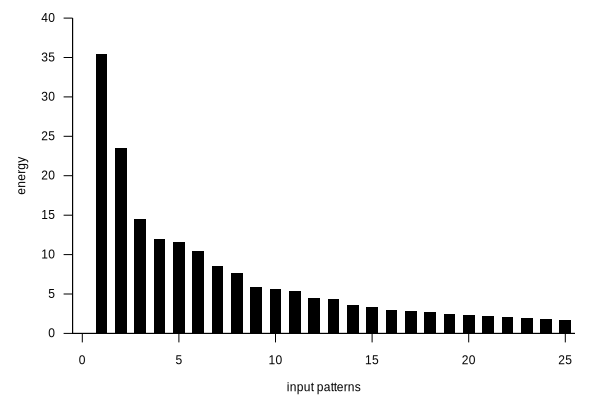

In [5]:
(* Plot controllability gramian eigenvalues *)
let () =
    let display_id = Jupyter_notebook.display "text/html" "" in
    let open Gp in
    let figure (module P: Plot) = 
        P.plot (A p_evals) 
        ~using:"($0+1):1" 
        ~style:"boxes fs solid 1.0 noborder fc rgb 'black' lw 2"
        [ barebone ; 
          set "boxwidth 0.6";
          borders [`left;`bottom]; 
          tics "out nomirror"; 
          xrange (-0.5,25.5);
          xlabel "input patterns";
          ylabel "energy"] in
    Juplot.draw ~display_id figure

### Plotting the directions of maximum and minimum variance when the system receives white noise impulse

val modes : int array = ...


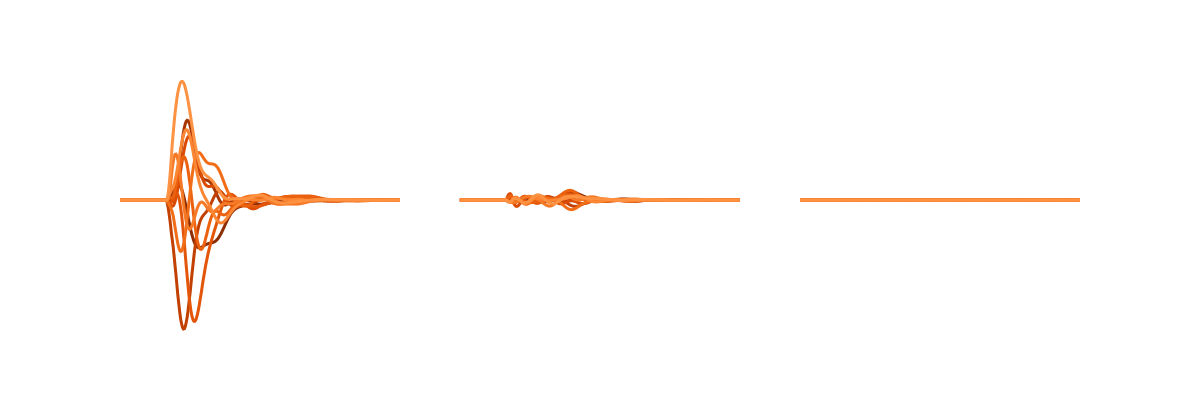

In [6]:
let modes = [|1;50;200|]
let () =
  let open Gp in
  let display_id = Jupyter_notebook.display "text/html" "" in
  let get mode =  
      List.init 10 (fun i -> 
          item (A xs.(i)) 
          ~using:(sprintf "1:%i" (succ mode)) 
          ~style:(sprintf "l lw 3 lc palette cb %i" (10-i))) in
  let figure (module P: Plot) = 
      P.ex "load 'oranges.pal'";
      P.multiplot ~spacing:(0.05,0.0) (1,3) (fun k row col ->
      P.plots  
      (get modes.(k))
      [ barebone ; 
        yrange (-18.,18.)] 
      ) in
  Juplot.draw ~display_id ~size:(1200,400) figure